In [ ]:
pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df_1 = pd.read_csv('/content/drive/MyDrive/gr_1.csv')
df_1

,Unnamed: 0,value/0/#text,value/0/@_name,value/1/#text,value/1/@_name,value/2/#text,value/2/@_name,value/3/#text,value/3/@_name,value/4/#text,value/4/@_name,value/5/#text,value/5/@_name
0,5,25431,id,34533,id_1,34534,id_2,Вертолет с 11 иностранцами на борту упал в Пак...,text_1,В Пакистане упал вертолет с 11 иностранцами,text_2,1,class
1,6,25432,id,34535,id_1,34536,id_2,Самолет вернулся в аэропорт Новосибирска из-за...,text_1,Самолет вернулся в новосибирский аэропорт из-з...,text_2,1,class
2,9,25443,id,34556,id_1,34557,id_2,Суд оправдал Васильеву в хищении акций на два ...,text_1,Суд оправдал Васильеву в хищении акций на 2 мл...,text_2,1,class
3,10,25447,id,34560,id_1,34561,id_2,Пушков: у Обамы не хватило духа лично поздрави...,text_1,Пушков: Обама не нашел в себе духа лично поздр...,text_2,1,class
4,11,25448,id,34562,id_1,34563,id_2,МЧС РФ: тела погибших российских дипломатов до...,text_1,Тела погибших в Непале российских дипломатов д...,text_2,1,class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1913,28473,id,37587,id_1,37588,id_2,Источник в МИД: Россия ввела визовые ограничен...,text_1,Визовые ограничения со стороны России стали от...,text_2,1,class
370,1915,28479,id,37584,id_1,37593,id_2,Саркози раскритиковал Олланда за отказ от посе...,text_1,Саркози осудил отказ Олланда приехать в Москву...,text_2,1,class
371,1916,28481,id,37594,id_1,37595,id_2,Почти 30 человек стали жертвами взрыва в мечет...,text_1,Не менее 26 человек погибли в результате терак...,text_2,1,class
372,1918,28483,id,37596,id_1,37597,id_2,Пушков: Саакашвили в Грузии мог бы возглавить ...,text_1,Пушков заявил о способности Саакашвили возглав...,text_2,1,class


In [ ]:
sentences1 = df_1['value/3/#text'].tolist()
embeddings1 = model.encode(sentences1)

In [ ]:
sentences2 = df_1['value/4/#text'].tolist()
embeddings2 = model.encode(sentences2)

In [ ]:
import torch
cos = torch.nn.CosineSimilarity(dim=1)
one = cos(torch.from_numpy(embeddings1), torch.from_numpy(embeddings2))
one

In [ ]:
import numpy as np
np.mean(np.array(one))

0.86239964

In [ ]:
np.std(np.array(one))

0.10078438

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/gr_0.csv')
df_2

,Unnamed: 0,value/0/#text,value/0/@_name,value/1/#text,value/1/@_name,value/2/#text,value/2/@_name,value/3/#text,value/3/@_name,value/4/#text,value/4/@_name,value/5/#text,value/5/@_name
0,7,25438,id,34547,id_1,34546,id_2,Васильева признана виновной в мошенничестве и ...,text_1,Васильева признана виновной в хищениях и отмыв...,text_2,0,class
1,13,25456,id,34567,id_1,34568,id_2,Троих подростков-убийц поймали в Подмосковье,text_1,В Подмосковье трое подростков признались в сер...,text_2,0,class
2,20,25477,id,34590,id_1,34589,id_2,Лидер либдемов Ник Клегг подал в отставку посл...,text_1,Лидер британских лейбористов подал в отставку ...,text_2,0,class
3,26,25491,id,34605,id_1,34603,id_2,Консерваторы увеличили отрыв от лейбористов на...,text_1,Консерваторы победили на выборах в Британии,text_2,0,class
4,27,25492,id,34606,id_1,34607,id_2,Лавров о возможной встрече с Керри: готов встр...,text_1,Лавров заявил о готовности встретиться с Керри...,text_2,0,class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,1903,28455,id,37516,id_1,37566,id_2,В аэропортах Москвы из-за грозы задержаны и от...,text_1,Более 150 авиарейсов отменили в московских аэр...,text_2,0,class
774,1904,28456,id,37567,id_1,37568,id_2,Объекты инфраструктуры для ВС России в Арктике...,text_1,Все объекты военной инфраструктуры в Арктике с...,text_2,0,class
775,1910,28466,id,37574,id_1,37575,id_2,Пушилин назвал насмешкой над Украиной назначен...,text_1,Медведев назвал назначение Саакашвили «продолж...,text_2,0,class
776,1914,28475,id,37591,id_1,37590,id_2,Россия планирует создать войска быстрого реаги...,text_1,В России появятся войска быстрого реагирования...,text_2,0,class


In [ ]:
sentences1 = df_2['value/3/#text'].tolist()
embeddings1 = model.encode(sentences1)

In [ ]:
sentences2 = df_2['value/4/#text'].tolist()
embeddings2 = model.encode(sentences2)

In [ ]:
import torch
cos = torch.nn.CosineSimilarity(dim=1)
zero = cos(torch.from_numpy(embeddings1), torch.from_numpy(embeddings2))
zero

In [ ]:
np.mean(np.array(zero))

0.78086686

In [ ]:
np.std(np.array(zero))

0.12156034

In [ ]:
df_3 = pd.read_csv('/content/drive/MyDrive/gr_-1.csv')
df_3

,Unnamed: 0,value/0/#text,value/0/@_name,value/1/#text,value/1/@_name,value/2/#text,value/2/@_name,value/3/#text,value/3/@_name,value/4/#text,value/4/@_name,value/5/#text,value/5/@_name
0,0,25349,id,34420,id_1,34421,id_2,Цены на нефть восстанавливаются,text_1,Парламент Словакии поблагодарил народы бывшего...,text_2,-1,class
1,1,25360,id,34438,id_1,34439,id_2,"""Гоголь-центр"" покажет видеозапись скандальног...",text_1,Кехман запретил «Гоголь-центру» показывать вид...,text_2,-1,class
2,2,25382,id,34475,id_1,34476,id_2,Агент: РФС вновь задерживает зарплату Фабио Ка...,text_1,СМИ: Агент Фабио Капелло грозится подать в суд...,text_2,-1,class
3,3,25423,id,34494,id_1,34519,id_2,День Победы в Москве обещает выдаться облачным,text_1,Любляна отпразднует День Победы вместе с Москвой,text_2,-1,class
4,4,25430,id,34531,id_1,34532,id_2,Посол РФ в США: Россия будет бороться с попытк...,text_1,Правительство запланировало заработать на лоте...,text_2,-1,class
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1909,28464,id,37477,id_1,37572,id_2,Саакашвили может стать губернатором Одесской о...,text_1,Медведев назвал назвачение Саакашвили одесским...,text_2,-1,class
768,1917,28482,id,37501,id_1,37595,id_2,Шестнадцать человек погибли в результате авари...,text_1,Не менее 26 человек погибли в результате терак...,text_2,-1,class
769,1921,28499,id,37606,id_1,37618,id_2,Полицейские в США застрелили афроамериканца в ...,text_1,Полицейский в США спас мужчину от наводнения и...,text_2,-1,class
770,1922,28510,id,37604,id_1,37636,id_2,"Полицейский в США спас мужчину от наводнения, ...",text_1,Washington Post: В 2015 году полицейские США з...,text_2,-1,class


In [ ]:
sentences1 = df_3['value/3/#text'].tolist()
embeddings1 = model.encode(sentences1)

In [ ]:
sentences2 = df_3['value/4/#text'].tolist()
embeddings2 = model.encode(sentences2)

In [ ]:
import torch
cos = torch.nn.CosineSimilarity(dim=1)
one_minus = cos(torch.from_numpy(embeddings1), torch.from_numpy(embeddings2))
one_minus

In [ ]:
np.mean(np.array(one_minus))

0.6419479

In [ ]:
np.std(np.array(one_minus))

0.17612147

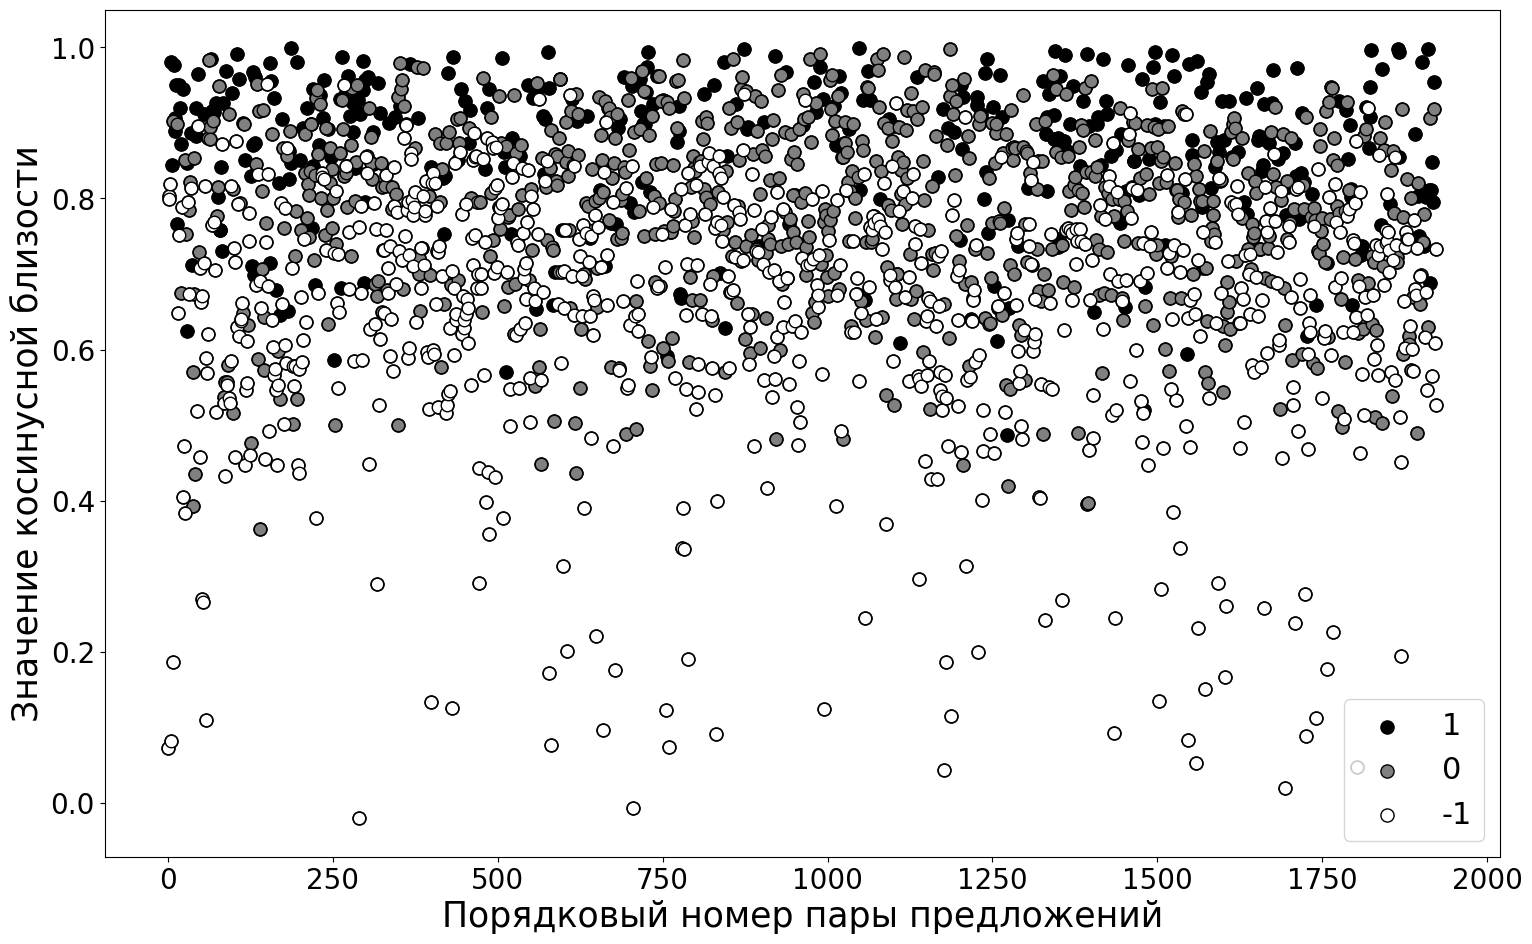

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 11))

x1 = df_1['Unnamed: 0'].tolist()
y1 = one
plt.plot(x1, y1, marker='o', color='black', markersize=9, linewidth=0, markeredgecolor='black')

x2 = df_2['Unnamed: 0'].tolist()
y2 = zero
plt.plot(x2, y2, marker='o', color='grey', markersize=9, linewidth=0, markeredgecolor='black')

x3 = df_3['Unnamed: 0'].tolist()
y3 = one_minus
plt.plot(x3, y3, marker='o', color='white', markersize=9, linewidth=0, markeredgecolor='black')

ax.scatter(x1, y1, label = '1', color = 'black', edgecolor='black', s=90)
ax.scatter(x2, y2, label = '0', color = 'grey', edgecolor='black', s=90)
ax.scatter(x3, y3, label = '-1', color = 'white', edgecolor='black', s=90)
ax.legend(fontsize=22)

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.xlabel("Порядковый номер пары предложений", fontsize = 25)
plt.ylabel("Значение косинусной близости", fontsize = 25)

plt.show()